In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import re
%matplotlib inline

### Load data

In [81]:
train = pd.read_csv('../data/train_2016_v2.csv')
prop = pd.read_csv('../data/properties_2016.csv')
#sample = pd.read_csv('./data/sample_submission.csv')

/Users/wanggene/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Prop in train

In [80]:
prop.set_index('parcelid', inplace=True)
prop.columns

NameError: name 'prop' is not defined

In [82]:
print(prop.shape)
print(train.shape)
prop_intrain = prop.loc[train['parcelid'].drop_duplicates()]

(2985217, 58)
(90275, 3)


KeyError: 'None of [0        11016594\n1        14366692\n2        12098116\n3        12643413\n4        14432541\n5        11509835\n6        12286022\n7        17177301\n8        14739064\n9        14677559\n10       10854446\n11       11672170\n12       10949761\n13       14665244\n14       14148540\n15       14057104\n16       17296797\n17       12524288\n18       14091502\n19       10815909\n20       12453853\n21       14253461\n22       14001034\n23       11458863\n24       13957980\n25       12752047\n26       11188425\n27       14646051\n28       10805063\n29       12524725\n           ...   \n90245    10757551\n90246    12558267\n90247    11710734\n90248    14347592\n90249    11341061\n90250    14027878\n90251    12756771\n90252    12758333\n90253    11295458\n90254    12757889\n90255    11308315\n90256    14353215\n90257    10753416\n90258    11756902\n90259    11994047\n90260    11440746\n90261    11703478\n90262    10965821\n90263    12067066\n90264    11683263\n90265    12062080\n90266    12265636\n90267    17109680\n90268    12268527\n90269    12920746\n90270    10774160\n90271    12046695\n90272    12995401\n90273    11402105\n90274    12566293\nName: parcelid, Length: 90150, dtype: int64] are in the [index]'

In [37]:
prop_intrain.shape

(90150, 57)

In [38]:
# checking missing value proportion
prop_intrain.count().sort_values() / prop_intrain.shape[0]



buildingclasstypeid             0.000177
finishedsquarefeet13            0.000366
basementsqft                    0.000477
storytypeid                     0.000477
yardbuildingsqft26              0.001054
fireplaceflag                   0.002440
architecturalstyletypeid        0.002884
typeconstructiontypeid          0.003306
finishedsquarefeet6             0.004648
decktypeid                      0.007299
poolsizesum                     0.010715
pooltypeid10                    0.012856
pooltypeid2                     0.013356
taxdelinquencyflag              0.019689
taxdelinquencyyear              0.019689
hashottuborspa                  0.026212
yardbuildingsqft17              0.029340
finishedsquarefeet15            0.039434
finishedfloor1squarefeet        0.075984
finishedsquarefeet50            0.075984
fireplacecnt                    0.106456
threequarterbathnbr             0.133067
pooltypeid7                     0.184936
poolcnt                         0.198292
numberofstories 

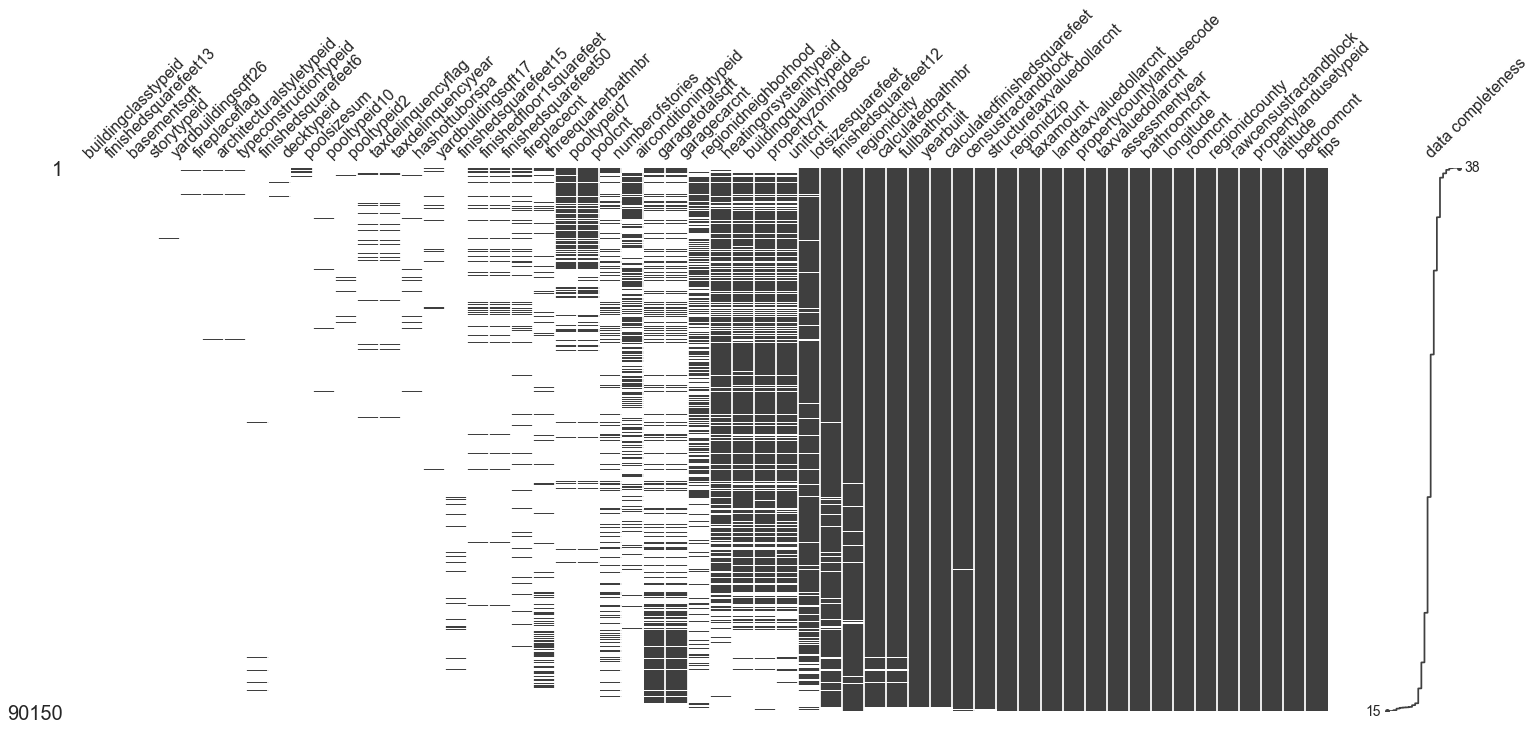

In [39]:
colnames = prop_intrain.count().sort_values().index
msno.matrix(msno.nullity_sort(prop_intrain[colnames], sort='descending'), labels=True)

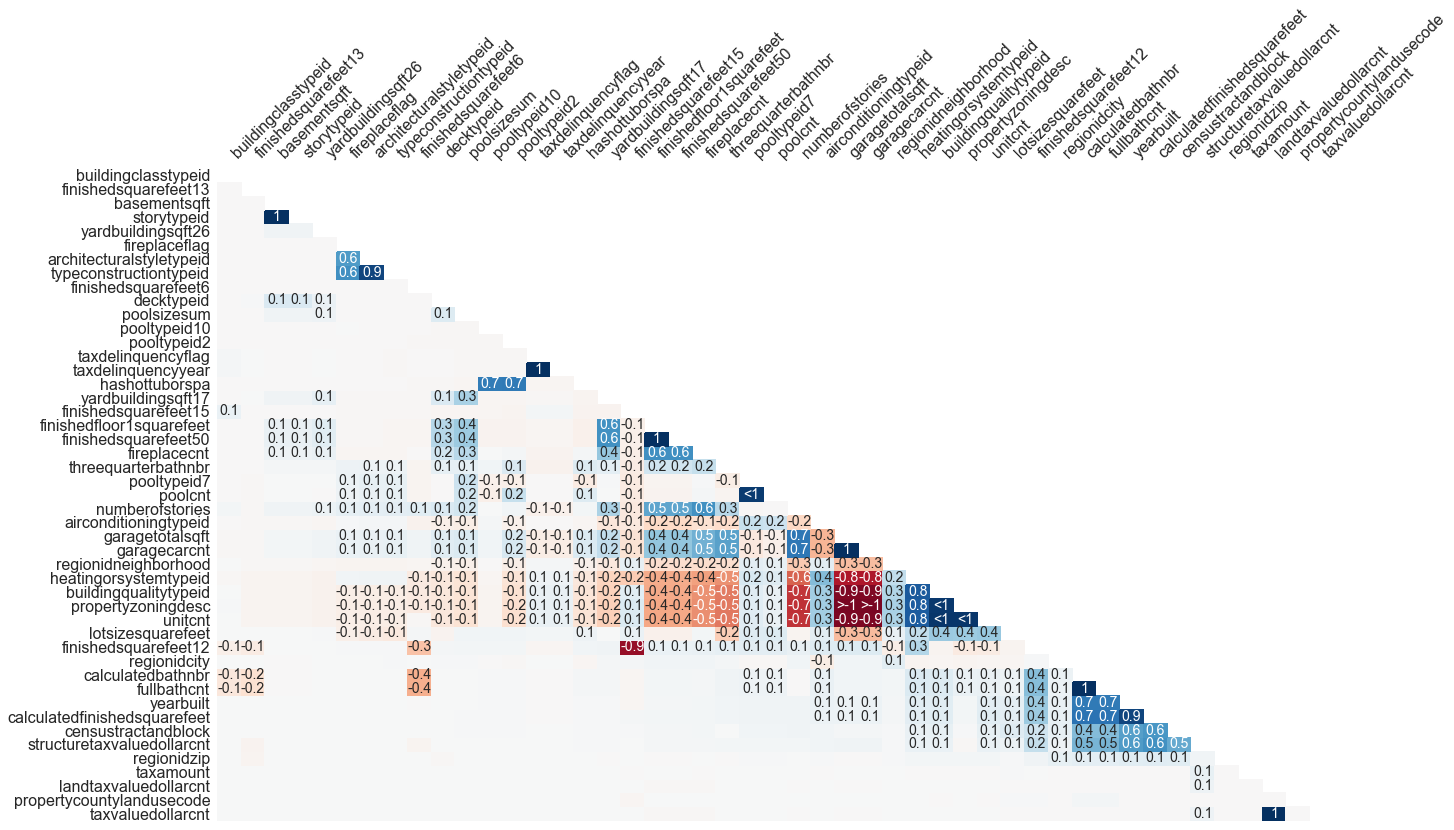

In [40]:
msno.heatmap(prop_intrain[colnames])

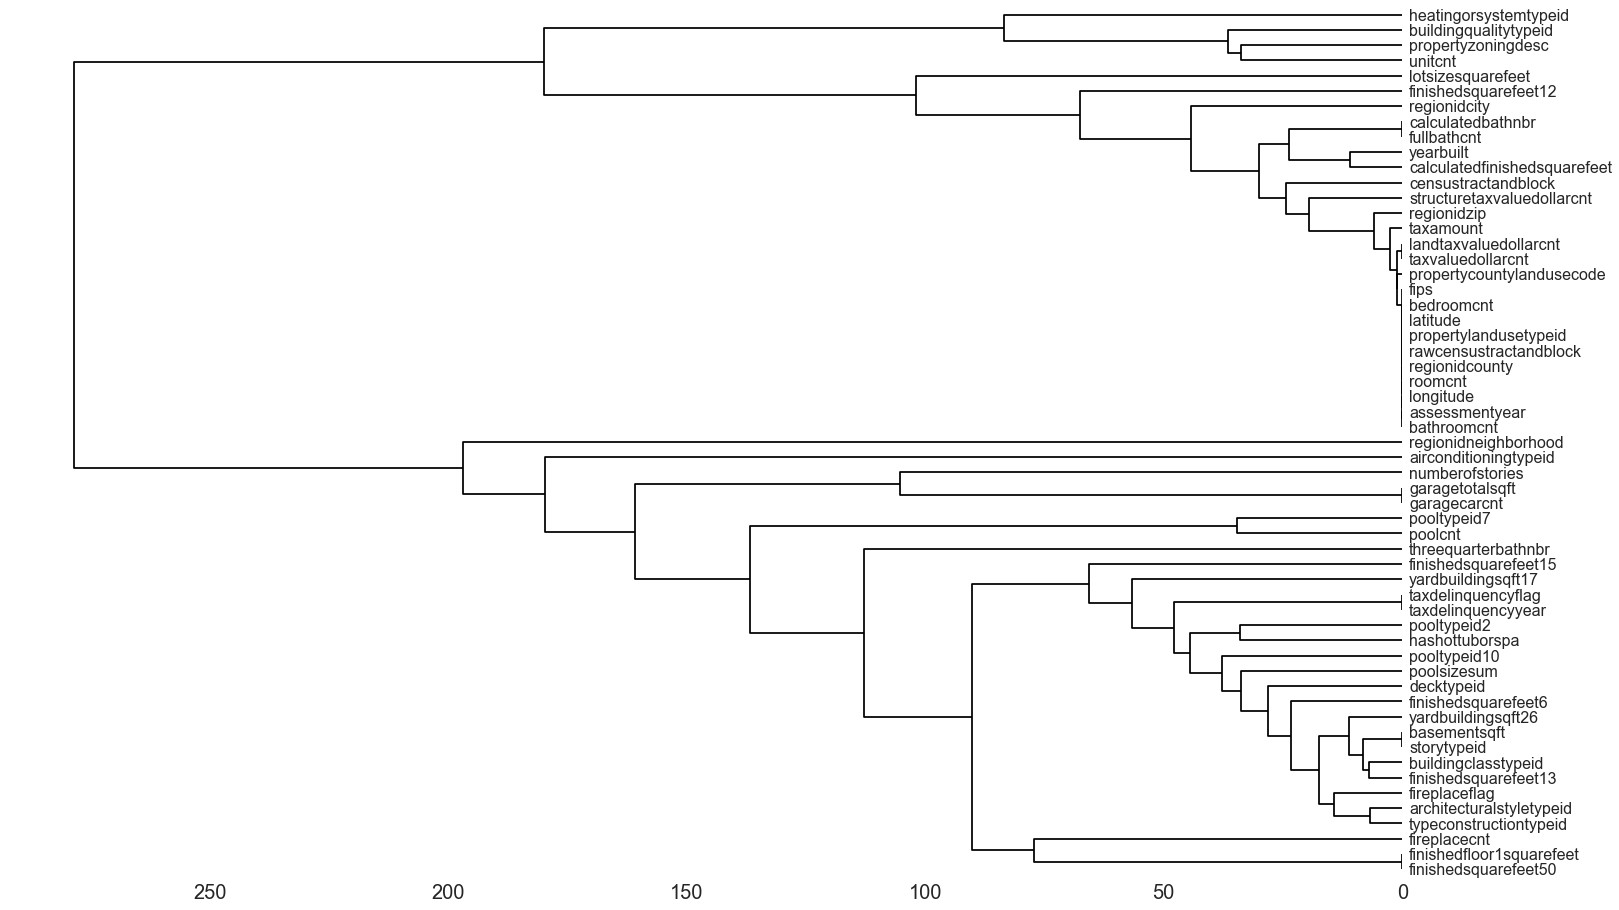

In [45]:
msno.dendrogram(prop_intrain[colnames])

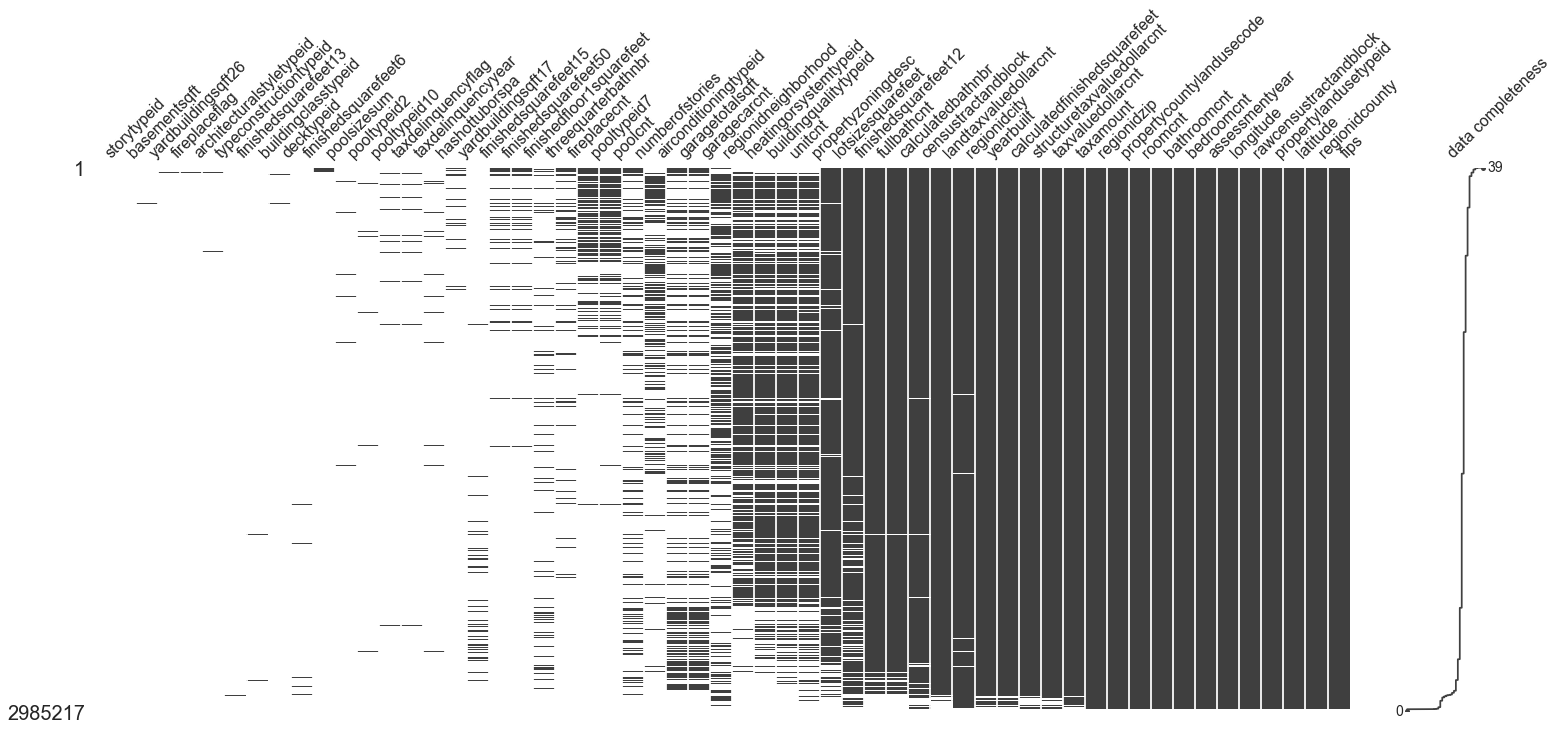

In [47]:
prop.count().sort_values() / prop.shape[0]
colnames2 = prop.count().sort_values().index
msno.matrix(msno.nullity_sort(prop[colnames2], sort='descending'), labels=True)

In [83]:
# load the data from zillow folder
str_tax = pd.read_csv("../data/str_cleaned.csv", index_col=0)
# select the columns, remove the other tax columns
feature_selected = ["basementsqft","bathroomcnt","bedroomcnt","calculatedbathnbr","calculatedfinishedsquarefeet","finishedsquarefeet12",    
"finishedsquarefeet13","finishedsquarefeet15","finishedsquarefeet6","fullbathcnt","garagecarcnt","garagetotalsqft",
"lotsizesquarefeet","poolsizesum", "roomcnt","unitcnt","yardbuildingsqft17","yardbuildingsqft26","yearbuilt","structuretaxvaluedollarcnt"  ]

data = str_tax[feature_selected]
data.shape

(89895, 20)

In [ ]:
cat = ["airconditioningtypeid","architecturalstyletypeid", "buildingqualitytypeid" ,"decktypeid"  ,            
"fips"    ,                 "fireplacecnt"        ,    "hashottuborspa",           "heatingorsystemtypeid",   
"poolcnt",                  "propertylandusetypeid",   "regionidcounty",           "storytypeid",             
"threequarterbathnbr",      "typeconstructiontypeid",  "numberofstories",          "fireplaceflag",           
"taxdelinquencyflag",       "taxdelinquencyyear"]

In [85]:
X_data = data.iloc[:,0:-1]
y_data = data.iloc[:,  -1]
print(X_data.shape)
print(y_data.shape)

(89895, 19)
(89895,)


### KNN

In [86]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state =42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Accuracy of knn k=5, on the training set {:.3f}" .format(knn.score(X_train, y_train)))
print("Accuracy of knn k=5, on the testing  set {:.3f}" .format(knn.score(X_test, y_test)))

Accuracy of knn k=5, on the training set 0.202
Accuracy of knn k=5, on the testing  set 0.003


### RF

In [88]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state =42)

forest = RandomForestClassifier(n_estimators=100, max_depth= 4, max_features='auto', random_state=0)
forest.fit(X_train, y_train)

print("Accuracy of Tree on the training set {:.3f}" .format(forest.score(X_train, y_train)))
print("Accuracy of Tree on the testing  set {:.3f}" .format(forest.score(X_test, y_test)))

KeyboardInterrupt: 

### Neural Network and Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=10,    random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy of mlp, on the training set {:.3f}" .format(mlp.score(X_train_scaled, y_train)))
print("Accuracy of mlp k=5, on the testing  set {:.3f}" .format(mlp.score(X_test_scaled, y_test)))